In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# We will drop some columns that are not interesting to this analysis
# "CUST_ID" : will be not usefull to group customers by their indentification
# "TENURE" :  is 12 for all lines, therefore not usefull to the analysis

df.drop(columns = ['CUST_ID', 'TENURE'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [4]:
# Treating missing values

missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [5]:
#  "MINIMUM_PAYMENTS" : there are 313 missinv values out of 8950 lines. Let's replace the missing values with the average of all non-null values

df.fillna(df.mean(), inplace = True)
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


In [7]:
# Normalizing the features

from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(df.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [8]:
# Executing clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

In [9]:
# Calculating the silhouette coefficient

from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = "euclidean")
print(silhouette)

0.3598221281407734


In [10]:
# Calculating Davies Bouldin

dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0825323077143267


In [11]:
# Calculating Calinski

calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3368.0328901744633


In [12]:
# Clusters validation

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski


In [13]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32247196740108697 1.3153263391513053 3449.798321471646


In [14]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3598819793429354 1.0820046889240587 3368.012868528942


In [15]:
s3, dbs3, calinski3 = clustering_algorithm(100, values)
print(s3, dbs3, calinski3)

0.21661409261581818 1.2672007982906957 1145.1548743572077


In [16]:
# Testing with a random sample of the data

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.04024522468071251 3.47215999066585 307.20764480854046
0.3598819793429354 1.0820046889240587 3368.012868528942


In [17]:
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.32247196740108697 1.3153263391513053 3449.798321471646
0.3598819793429354 1.0820046889240587 3368.012868528942
0.21661409261581818 1.2672007982906957 1145.1548743572077


In [18]:
# Cluster stability

set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3656306305676184 1.0656602783374391 1186.1450696818742
0.35006116968849854 1.1444164908164267 1173.5985467804092
0.36026554194417126 1.108109534158988 1139.9710438287696


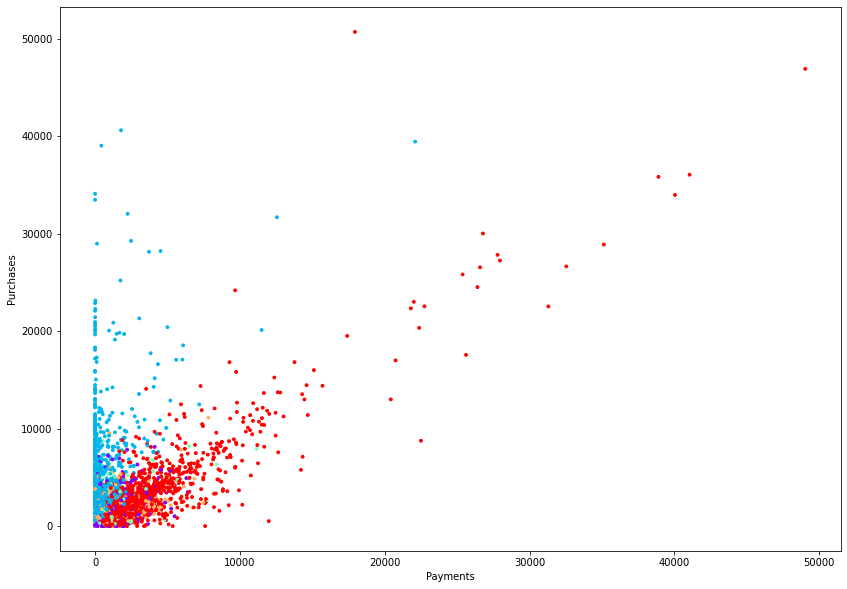

In [19]:
# Visualizing the clusters

import matplotlib.pyplot as plt
plt.figure(figsize = (14,10))
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c = labels, s = 8, cmap = 'rainbow')
plt.xlabel("Payments")
plt.ylabel("Purchases")
plt.show()


In [20]:
df['cluster'] = labels

In [21]:
df.groupby('cluster').describe() 


BALANCE                                                                \
          count         mean          std       min          25%          50%   
cluster                                                                         
0        3253.0   445.882560   847.271395  0.000000    24.099873    84.067421   
1        1071.0  1800.717763  1985.639837  0.000000   507.620537  1095.984736   
2         434.0  1836.656555  1828.238398  0.000000   951.552333  1271.041168   
3        2657.0  3034.461264  2480.968273  6.824905  1254.480637  2170.916313   
4        1535.0  1148.763839  1665.728668  0.000000   214.323634   559.750373   

                                   BALANCE_FREQUENCY            ...  \
                 75%           max             count      mean  ...   
cluster                                                         ...   
0         417.878821   9630.367575            3253.0  0.778667  ...   
1        2321.124348  14581.459140            1071.0  0.862918  ...   
2        2000.252015  11670.179850             434.0  0.943164  ...   
3        4223.832142  18495.558550            2657.0  0.962479  ...   
4        1383.705567  19043.138560            1535.0  0.930128  ...   

        MINIMUM_PAYMENTS               PRC_FULL_PAYMENT                      \
                     75%           max            count      mean       std   
cluster                                                                       
0             243.235999   4483.503862           3253.0  0.248885  0.347434   
1             891.640865  21235.065300           1071.0  0.117296  0.186974   
2            6418.068279  76406.207520            434.0  0.018295  0.088560   
3            1330.173932   8345.641905           2657.0  0.001794  0.023225   
4             538.211814  18621.013310           1535.0  0.278693  0.367086   

                                            
         min  25%       50%       75%  max  
cluster                                     
0        0.0  0.0  0.000000  0.454545  1.0  
1        0.0  0.0  0.083333  0.142857  1.0  
2        0.0  0.0  0.000000  0.000000  1.0  
3        0.0  0.0  0.000000  0.000000  0.6  
4        0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [22]:
# Clusters centroids

centroids = kmeans.cluster_centers_
centroids

array([[6.92506510e-02, 2.30638870e-04, 1.21427684e-01, 4.79744862e-02,
        7.35542588e-02, 2.31501675e-02, 1.71787443e-04, 3.36100283e-05,
        1.39329589e-04, 7.54758670e-06, 1.18111389e-04, 2.85576762e-03,
        9.41926341e-01, 1.54620743e-01, 6.46945368e-02, 7.67914242e-05],
       [2.35922603e-01, 2.16616069e-04, 6.00582498e-02, 3.39853470e-02,
        2.60781223e-02, 4.00764800e-01, 5.26904455e-05, 2.04101094e-05,
        3.53115349e-05, 6.55494028e-05, 1.57406410e-03, 1.12114251e-03,
        5.34849053e-01, 5.97441862e-01, 1.05216554e-01, 2.77383565e-05],
       [3.11455558e-01, 2.66356425e-04, 1.55998832e-01, 3.50086956e-02,
        1.21352751e-01, 5.78241060e-02, 1.73556210e-04, 2.57488699e-05,
        1.54560009e-04, 2.05256708e-05, 4.30533663e-04, 3.86704024e-03,
        3.92878831e-01, 2.42171682e-01, 6.80873587e-01, 3.99682246e-06],
       [5.03113470e-01, 2.70803777e-04, 6.18905156e-02, 3.63484711e-02,
        2.55637004e-02, 2.52480356e-01, 6.72201642e-05, 2.576

In [23]:
# Features selections

max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0217
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0035
CASH_ADVANCE 
0.0227
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0342
PAYMENTS 
0.0281
MINIMUM_PAYMENTS 
0.0538
PRC_FULL_PAYMENT 
0.0000


* BALANCE 0.0217
* PURCHASES 0.0197
* CASH_ADVANCE 0.0226
* CREDIT_LIMIT 0.0343
* PAYMENTS 0.0281
* MINIMUM_PAYMENTS 0.0542

In [24]:
# Filtering the selected features

description = df.groupby("cluster")["BALANCE", "PURCHASES", 
                      "CASH_ADVANCE","CREDIT_LIMIT",
                      "PAYMENTS", "MINIMUM_PAYMENTS"]

n_clients = description.size()

description = description.mean()

description["n_clients"] = n_clients

description

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,n_clients
cluster,,,,,,,
0,445.882560,633.236400,139.630571,5162.539569,821.288550,261.406155,3253
1,1800.717763,470.954463,3275.589124,3979.805053,4708.189800,743.391419,1071
2,1836.656555,803.421590,390.894174,2119.354839,1247.108721,5739.127796,434
3,3034.461264,387.283406,1634.451196,4494.279262,967.826994,1037.019228,2657
4,1148.763839,3281.222176,186.408703,4109.518014,3051.956376,548.521543,1535


### Clusters Analysis

* CLUSTER 0: Lowest expenses. Lowest values of cash advance. Good payers.
* CLUSTER 1: Highest expenses. Lowest values of purchases.  Worse payers. **Focus is cash advance.**
* CLUSTER 2: Highest purchases. **Spends more with purchases.**Best payers.
* CLUSTER 3: **Highest amount in cash advance.**
* CLUSTER 4: Lowest credit limit. Bad payers.